# Artificial Intelligence (CS6364-002) 
## Homework 3 - Question 4
## Submission by - Adithya Sundararajan Iyer (asi200000)


In [1]:
!pip install idx2numpy

# importing the libraries
import pandas as pd
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
from torch.autograd import Variable
from torch.optim import Adam
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=75f9d836a3935f3a23b2f7b0f154f7f488d2c44b66a4b5fd04a0683de2342091
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Loading the data set
train = 'train-images-idx3-ubyte'
xTrain = idx2numpy.convert_from_file(train)
train_labels = 'train-labels-idx1-ubyte'
yTrain = idx2numpy.convert_from_file(train_labels)
test = 't10k-images-idx3-ubyte'
xTest = idx2numpy.convert_from_file(test)
test_labels = 't10k-labels-idx1-ubyte'
yTest = idx2numpy.convert_from_file(test_labels)

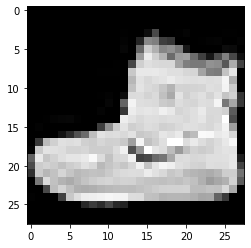

In [7]:
i = 0
plt.imshow(xTrain[i], cmap='gray')

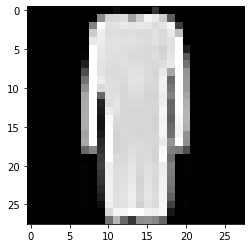

In [8]:
plt.imshow(xTrain[i+25], cmap='gray')

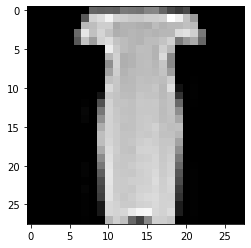

In [9]:
plt.imshow(xTrain[i+51], cmap='gray')

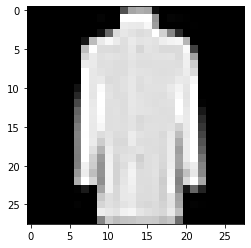

In [10]:
plt.imshow(xTrain[i+75], cmap='gray')

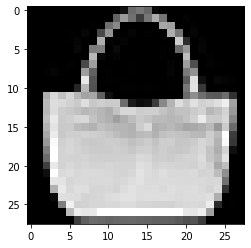

In [11]:
plt.imshow(xTrain[i+100], cmap='gray')

In [12]:
# Pre processing the data
xTrain = xTrain/255.0
xTest = xTest/255.0

In [13]:
xTrain.astype(np.float64)
xTest.astype(np.float64)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# train validation 90:10 split
train_x, validate_x, train_y, validate_y = train_test_split(xTrain, yTrain, test_size = 0.1)

In [15]:
# Adding batch size and converting using torch
train_x = train_x.reshape(54000, 1, 28, 28)
train_x  = torch.from_numpy(train_x)



train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)


train_x.shape, train_y.shape

(torch.Size([54000, 1, 28, 28]), torch.Size([54000]))

In [16]:
validate_x = validate_x.reshape(6000, 1, 28, 28)
validate_x  = torch.from_numpy(validate_x)

validate_y = validate_y.astype(int);
validate_y = torch.from_numpy(validate_y)

validate_x.shape, validate_y.shape

(torch.Size([6000, 1, 28, 28]), torch.Size([6000]))

In [17]:
# Creating a Neural Network Model
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [18]:
CNNmodel = Net()

optimizer = Adam(CNNmodel.parameters(), lr=0.07)
criterion = CrossEntropyLoss()
print(CNNmodel)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [19]:
trainLosses = []
validationLosses = []

In [20]:
def train(epoch):
    CNNmodel.train()
    tr_loss = 0
    xTrain, yTrain = Variable(train_x).to(torch.float32), Variable(train_y).type(torch.LongTensor)
    x_val, y_val = Variable(validate_x).to(torch.float32), Variable(validate_y).type(torch.LongTensor)

    optimizer.zero_grad()

    output_train = CNNmodel(xTrain)
    output_val = CNNmodel(x_val)

    loss_train = criterion(output_train, yTrain)
    loss_val = criterion(output_val, y_val)
    trainLosses.append(loss_train.detach().numpy())
    validationLosses.append(loss_val.detach().numpy())

    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [21]:
# training the network
num_epochs = 25

for epoch in range(num_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.4394, grad_fn=<NllLossBackward0>)
Epoch :  3 	 loss : tensor(3.6214, grad_fn=<NllLossBackward0>)
Epoch :  5 	 loss : tensor(2.1957, grad_fn=<NllLossBackward0>)
Epoch :  7 	 loss : tensor(1.6622, grad_fn=<NllLossBackward0>)
Epoch :  9 	 loss : tensor(1.3099, grad_fn=<NllLossBackward0>)
Epoch :  11 	 loss : tensor(1.2576, grad_fn=<NllLossBackward0>)
Epoch :  13 	 loss : tensor(1.1819, grad_fn=<NllLossBackward0>)
Epoch :  15 	 loss : tensor(0.9883, grad_fn=<NllLossBackward0>)
Epoch :  17 	 loss : tensor(0.8586, grad_fn=<NllLossBackward0>)
Epoch :  19 	 loss : tensor(0.8154, grad_fn=<NllLossBackward0>)
Epoch :  21 	 loss : tensor(0.8241, grad_fn=<NllLossBackward0>)
Epoch :  23 	 loss : tensor(0.7843, grad_fn=<NllLossBackward0>)
Epoch :  25 	 loss : tensor(0.7675, grad_fn=<NllLossBackward0>)


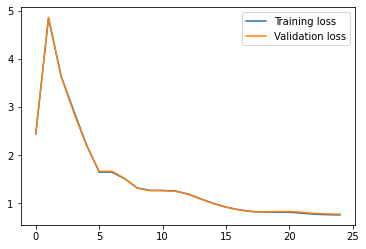

In [22]:
# plotting the training and validation loss

plt.plot(trainLosses, label='Training loss')
plt.plot(validationLosses, label='Validation loss')
plt.legend()
plt.show()

In [23]:
# accuracy on training set
with torch.no_grad():
    output = CNNmodel(train_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

Taccuracy = accuracy_score(train_y, predictions)
print('training accuracy', Taccuracy)

training accuracy 0.7393703703703703


In [24]:
# accuracy on validation set
with torch.no_grad():
    output = CNNmodel(validate_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)


Vaccuracy = accuracy_score(validate_y, predictions)
print('validation accuracy', Vaccuracy)

validation accuracy 0.7391666666666666


In [25]:
# Test set
test_x = xTest.reshape(10000, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([10000, 1, 28, 28])

In [26]:
with torch.no_grad():
    output = CNNmodel(test_x.to(torch.float32))

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

In [27]:
predictions

array([7, 2, 1, ..., 8, 1, 5])

In [28]:
yTest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
accuracy_score(yTest, predictions)

0.7355